# Examine data

This notebook is examining the expression data that will be used in the network analysis

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import plotnine as pn
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import random
import numpy as np
from scipy.spatial.distance import pdist, squareform
from core_acc_modules import paths

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Load expression data
pao1_compendium_filename = paths.PAO1_COMPENDIUM
pa14_compendium_filename = paths.PA14_COMPENDIUM

In [3]:
pao1_compendium = pd.read_csv(pao1_compendium_filename, sep="\t", header=0, index_col=0)
pa14_compendium = pd.read_csv(pa14_compendium_filename, sep="\t", header=0, index_col=0)

## Visualize distribution of expression data

Text(0.5, 1.05, 'Random set of genes')

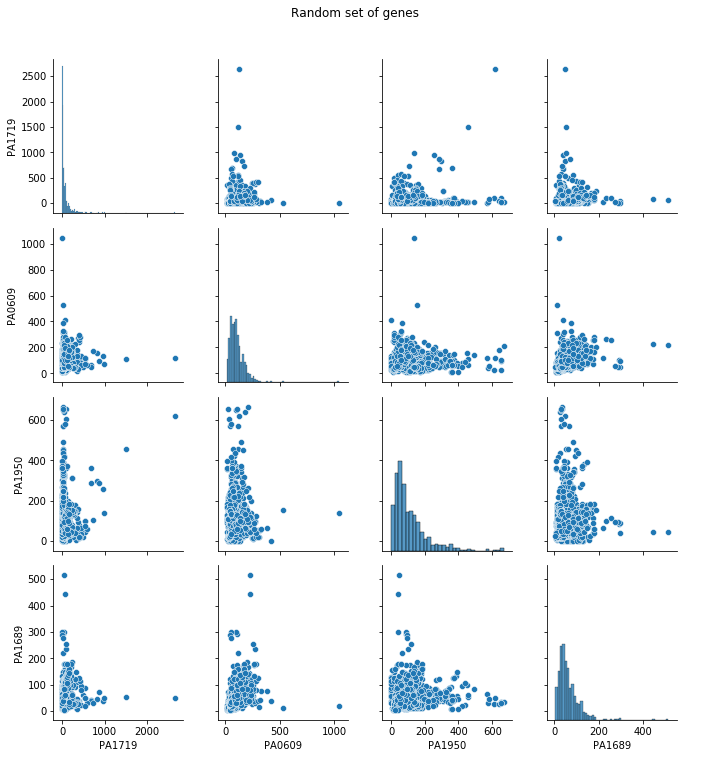

In [4]:
# Random PAO1 genes
random_pao1_ids = random.sample(list(pao1_compendium.columns), 4)
sns.pairplot(pao1_compendium[random_pao1_ids])
plt.suptitle("Random set of genes", y=1.05)

In [5]:
# Try removing outlier samples
pao1_compendium_tmp = pao1_compendium[pao1_compendium["PA1337"] < 200]

Text(0.5, 1.05, 'Co-operonic set of genes')

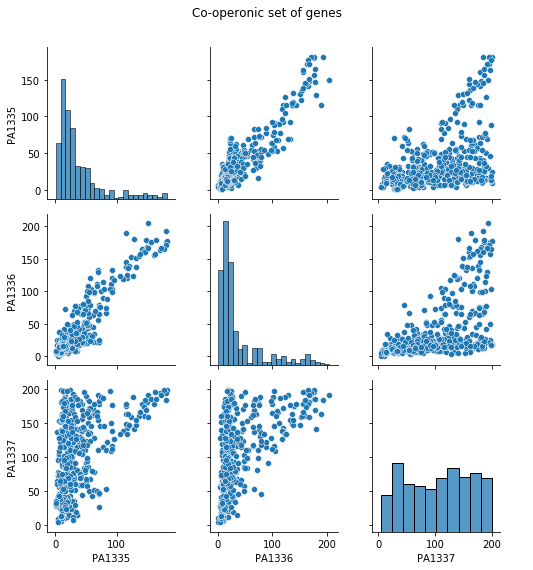

In [6]:
# Co-operonic PAO1 genes
# pao1_co_operonic_ids = ["PA0001", "PA0002", "PA0003", "PA0004"]
# pao1_co_operonic_ids = ["PA0054","PA0055", "PA0056"]
pao1_co_operonic_ids = ["PA1335", "PA1336", "PA1337"]
sns.pairplot(pao1_compendium_tmp[pao1_co_operonic_ids])
plt.suptitle("Co-operonic set of genes", y=1.05)

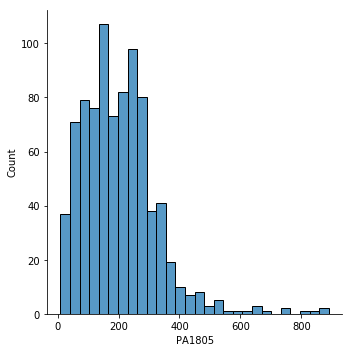

In [7]:
# Houskeeping PAO1 gene that we would expect a consistently high expression across samples
# which doesn't have that peak at 0
sns.displot(pao1_compendium["PA1805"])

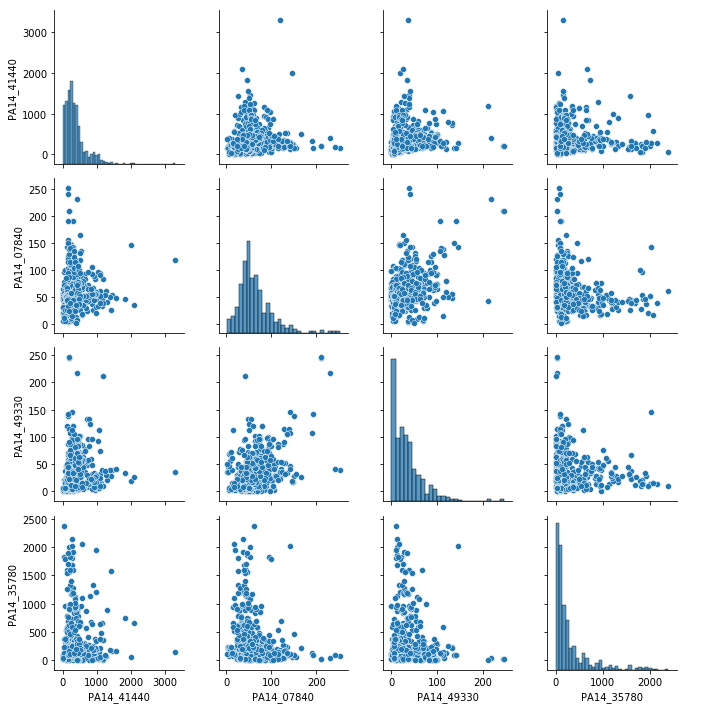

In [8]:
# Random PA14 gene
random_pa14_ids = random.sample(list(pa14_compendium.columns), 4)
sns.pairplot(pa14_compendium[random_pa14_ids])

**Observations:**
These pair plots tell us what the distribution of the genes look like in our compendia. Overall it looks like genes tend to have a heavy right tail and some genes have a spike at 0 while others don't. As expected, our example housekeeping gene doesn't have this peak since this is a gene that tends to be highly active across all samples.

These pair plots also give us a rough sense for how correlated genes are. We would expect co-operonic genes to be more highly correlated compared to a random set of genes, which we do see. Some correlations appear not as strong due to the differences in scales between genes - something to consider when we are looking at correlations between genes.

## Plot distribution of pairwise distances

This will particularly help to inform the parameters we use for DBSCAN, which is density based. Here we looking at the distribution of both global distances and local distances. Global distances are defined using `pdist`, which takes the pairwise Euclidean distance of each of the correlation vectors (so the distance between gene `p` and gene `q` is based on the difference in correlation between `p` and all other genes, and `q` and all other genes). Whereas the local distance is defined as 1 - |correlation(`p`, `q`)|

In [9]:
# Get distribution of pairwise distances to determine a cutoff defining what a dense region should be
f1 = sns.displot(pdist(pao1_corr))
plt.title("Distribution of pairwise distances for PAO1 genes")

NameError: name 'pao1_corr' is not defined

In [ ]:
f2 = sns.displot(pdist(pa14_corr))
plt.title("Distribution of pairwise distances for PA14 genes")

In [ ]:
pao1_local_dist = 1 - pao1_corr.abs()
pao1_local_dist = pao1_local_dist.where(
    np.triu(np.ones(pao1_local_dist.shape), k=1).astype(np.bool)
)
pao1_local_dist = pao1_local_dist.stack().reset_index()
pao1_local_dist.columns = ["Row", "Column", "Value"]

pao1_local_dist.head(10)

In [ ]:
f3 = sns.displot(pao1_local_dist["Value"])
plt.title("Distribution of pairwise distances for PAO1 genes")

In [ ]:
pa14_local_dist = 1 - pa14_corr.abs()
pa14_local_dist = pa14_local_dist.where(
    np.triu(np.ones(pa14_local_dist.shape), k=1).astype(np.bool)
)
pa14_local_dist = pa14_local_dist.stack().reset_index()
pa14_local_dist.columns = ["Row", "Column", "Value"]

pa14_local_dist.head(10)

In [ ]:
f4 = sns.displot(pa14_local_dist["Value"])
plt.title("Distribution of pairwise distances for PA14 genes")